In [ ]:
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="llava-hf/llava-v1.6-vicuna-7b-hf")
messages = [
    {
      "role": "user",
      "content": [
          {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"},
          {"type": "text", "text": "What does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud"},
        ],
    },
]

out = pipe(text=messages, max_new_tokens=20)
print(out)

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that auth

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/176 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Device set to use cpu


[{'input_text': [{'role': 'user', 'content': [{'type': 'image', 'url': 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg'}, {'type': 'text', 'text': 'What does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud'}]}], 'generated_text': [{'role': 'user', 'content': [{'type': 'image', 'url': 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg'}, {'type': 'text', 'text': 'What does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud'}]}, {'role': 'assistant', 'content': ' The label 15 represents the ash cloud.'}]}]


In [ ]:
questions_on_empiricism = [
    'Alex can see things with her eyes. When could Alex see with her eyes for the first time?',
    'When there is a sound close by, Alex can hear it. When could Alex hear sounds for the first time?',
    'When seeing a red flower and a blue flower, Alex can tell that they are different colors. Alex can tell colors apart. \
    When could Alex tell colors apart for the first time?',
    'When there is a car approaching, Alex can tell that the car is getting closer. Alex can tell what is near and what is far. \
    When could Alex tell near and far for the first time?',
    'When Alex sees someone hold an object and then drop it, Alex thinks the object will fall. Alex thinks objects will fall if we let go of them.\
     When could Alex think that for the first time?',
    'If Alex sees a toy being hidden in a box, she will think the object is still there even though she can no longer see it.\
     When could Alex think that for the first time?',
    'f Alex sees two cookies, one with 5 chocolate chips in it and one with 20 chocolate chips in it, she can tell which cookie has more chocolate chips without counting. Alex can tell which has more.\
     When could Alex tell which has more for the first time?',
    'If Alex sees a turtle that is upside down and struggling to get on its feet, she thinks that she should help the turtle. Alex thinks that helping is the right thing to do. \
    When could Alex think that for the first time?',
    'Alex can read books. When could Alex read for the first time? '
]

Path to dataset files: /root/.cache/kagglehub/datasets/aiolapo/fgnet-dataset/versions/1
Found 1002 JPG images.
Displaying image: /root/.cache/kagglehub/datasets/aiolapo/fgnet-dataset/versions/1/FGNET/images/050A10.JPG


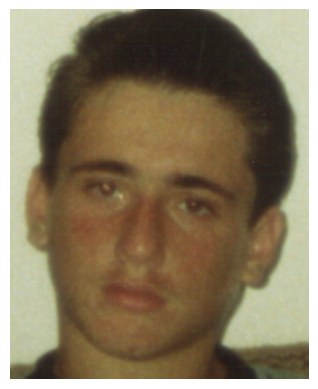

In [4]:
import kagglehub
import glob
from PIL import Image
import matplotlib.pyplot as plt
import random

# FGNET age progression dataset from kaggle
path = kagglehub.dataset_download("aiolapo/fgnet-dataset")

jpg_files = glob.glob(f"{path}/**/*.JPG", recursive=True)

img_path = random.choice(jpg_files)
print("Displaying image:", img_path)
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
pipe = pipeline("image-text-to-text", model="llava-hf/llava-v1.6-vicuna-7b-hf")

messages = [
    {
      "role": "user",
      "content": [
          {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"},
          {"type": "text", "text": "What does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud"},
        ],
    },
]

out = pipe(text=messages, max_new_tokens=20)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Device set to use cpu


KeyboardInterrupt: 